# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 100)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'requests'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#counters

city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 1 of Set 1 : russell
City not found. Skipping...
Processing Record 2 of Set 1 : chokurdakh
Processing Record 3 of Set 1 : sao joao del rei
Processing Record 4 of Set 1 : show low
Processing Record 5 of Set 1 : saldanha
Processing Record 6 of Set 1 : busselton
Processing Record 7 of Set 1 : rudnyy
Processing Record 8 of Set 1 : bonnyville
Processing Record 9 of Set 1 : bredasdorp
Processing Record 10 of Set 1 : golden
Processing Record 11 of Set 1 : vaini
Processing Record 12 of Set 1 : berlevag
City not found. Skipping...
Processing Record 13 of Set 1 : rocha
Processing Record 14 of Set 1 : chuy
Processing Record 15 of Set 1 : airai
Processing Record 16 of Set 1 : puerto ayora
Processing Record 17 of Set 1 : lebu
Processing Record 18 of Set 1 : punta arenas
Processing Record 19 of Set 1 : port elizabeth
Processing Record 20 of Set 1 : butaritari
Processing Record 21 of Set 1 : castro
Processing Record 22 of Set 1 : namatanai
Processing Record 23 of Set 1 : saskylakh
P

Processing Record 35 of Set 4 : nanortalik
Processing Record 36 of Set 4 : avarua
City not found. Skipping...
Processing Record 37 of Set 4 : erdenet
City not found. Skipping...
Processing Record 38 of Set 4 : nome
Processing Record 39 of Set 4 : meulaboh
Processing Record 40 of Set 4 : hervey bay
Processing Record 41 of Set 4 : udachnyy
Processing Record 42 of Set 4 : madingou
Processing Record 43 of Set 4 : ponta do sol
Processing Record 44 of Set 4 : harper
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 : norman wells
Processing Record 46 of Set 4 : vila
Processing Record 47 of Set 4 : naryan-mar
Processing Record 48 of Set 4 : muleba
Processing Record 49 of Set 4 : te anau
Processing Record 50 of Set 4 : gornopravdinsk
Processing Record 0 of Set 5 : kamenka
Processing Record 1 of Set 5 : coihaique
Processing Record 2 of Set 5 : merauke
Processing Record 3 of Set 5 : hondagua
Processing Record 4 of Set 5 : nichinan
P

Processing Record 17 of Set 8 : matara
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 8 : pronsk
Processing Record 19 of Set 8 : coquimbo
City not found. Skipping...
Processing Record 20 of Set 8 : san pedro
Processing Record 21 of Set 8 : panama city
Processing Record 22 of Set 8 : sampit
Processing Record 23 of Set 8 : puerto madryn
Processing Record 24 of Set 8 : burnie
Processing Record 25 of Set 8 : zdvinsk
Processing Record 26 of Set 8 : sao filipe
Processing Record 27 of Set 8 : lagoa
Processing Record 28 of Set 8 : santa cruz
Processing Record 29 of Set 8 : atar
Processing Record 30 of Set 8 : portel
Processing Record 31 of Set 8 : elko
Processing Record 32 of Set 8 : aswan
City not found. Skipping...
Processing Record 33 of Set 8 : husavik
Processing Record 34 of Set 8 : tocopilla
Processing Record 35 of Set 8 : murgab
Processing Record 36 of Set 8 : vestmannaeyjar
Processing Record 37 of Set 8 : nicoya
Processing Record 38 of Set 8 : basco

Processing Record 50 of Set 11 : moen
Processing Record 0 of Set 12 : koumac
Processing Record 1 of Set 12 : soria
Processing Record 2 of Set 12 : grajau
Processing Record 3 of Set 12 : trairi
Processing Record 4 of Set 12 : baker city
Processing Record 5 of Set 12 : longonjo
Processing Record 6 of Set 12 : pozoblanco
Processing Record 7 of Set 12 : laguna
Processing Record 8 of Set 12 : kaohsiung


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Russell,32.3502,-85.1999,74.91,90,40,8.05,US,1624133565
1,Chokurdakh,70.6333,147.9167,61.21,42,79,10.74,RU,1624133566
2,São João del Rei,-21.1356,-44.2617,63.21,77,100,10.25,BR,1624133566
3,Show Low,34.2542,-110.0298,97.07,13,1,6.91,US,1624133566
4,Saldanha,-33.0117,17.9442,65.44,44,16,8.23,ZA,1624133567


In [7]:
weather_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Clouds        569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [8]:
weather_df.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df[weather_df['Humidity'] > 100]
#Can skip since none are showing up

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df['Humidity'] < 100]

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Russell,32.3502,-85.1999,74.91,90,40,8.05,US,1624133565
1,Chokurdakh,70.6333,147.9167,61.21,42,79,10.74,RU,1624133566
2,São João del Rei,-21.1356,-44.2617,63.21,77,100,10.25,BR,1624133566
3,Show Low,34.2542,-110.0298,97.07,13,1,6.91,US,1624133566
4,Saldanha,-33.0117,17.9442,65.44,44,16,8.23,ZA,1624133567
...,...,...,...,...,...,...,...,...,...
564,Baker City,44.7749,-117.8344,84.94,27,1,11.50,US,1624133695
565,Longonjo,-12.9067,15.2533,59.81,37,6,3.53,AO,1624133695
566,Pozoblanco,38.3791,-4.8483,68.58,45,9,5.64,ES,1624133695
567,Laguna,38.4210,-121.4238,109.65,20,1,4.00,US,1624133696


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

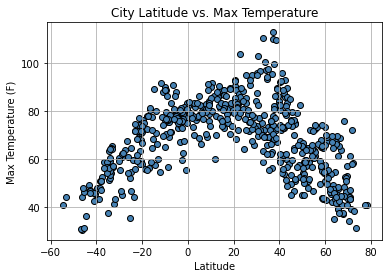

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

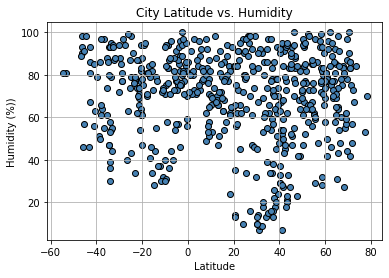

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

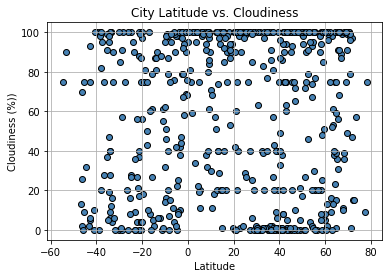

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

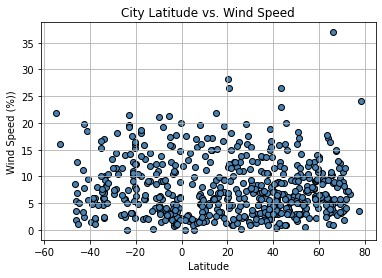

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

In [71]:
north_df = weather_df.loc[weather_df['Lat'] > 0]
south_df = weather_df.loc[weather_df['Lat'] < 0]

In [72]:

north_df = pd.DataFrame(north_df)

south_df = pd.DataFrame(south_df)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

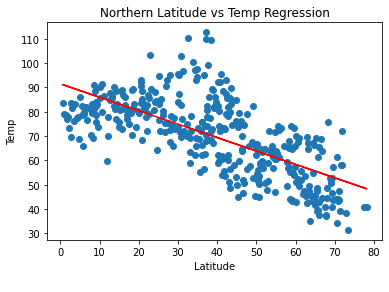

In [81]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Latitude vs Temp Regression")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

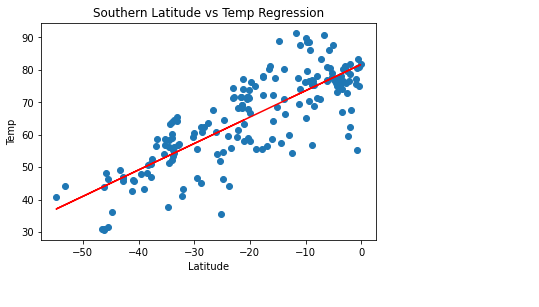

In [82]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Latitude vs Temp Regression")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [ ]:
#Here these seems to be a strong indication that the temp becomes warmer the closer a city is located to a lat = 0

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

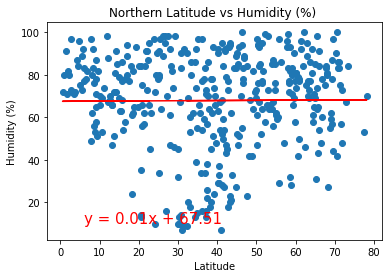

In [83]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Latitude vs Humidity (%) ")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

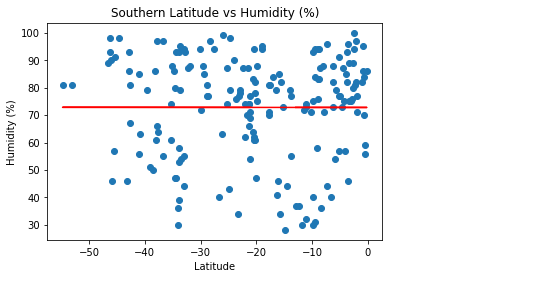

In [84]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Latitude vs Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [ ]:
#Humidity seems to be the same no matter latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

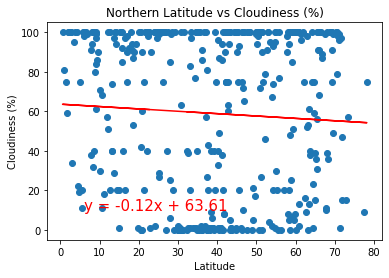

In [85]:
x_values = north_df['Lat']
y_values = north_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Latitude vs Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

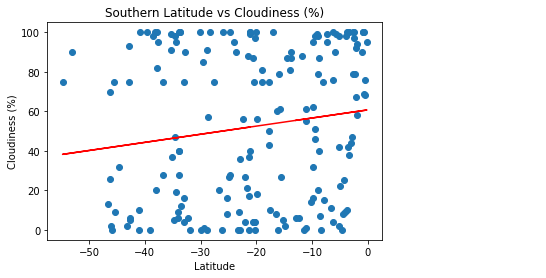

In [86]:
x_values = south_df['Lat']
y_values = south_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Latitude vs Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [ ]:
#Seems to be with full clouds or no clouds but both plots are similar in that they are polarized to the tops and bottom of the graph

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

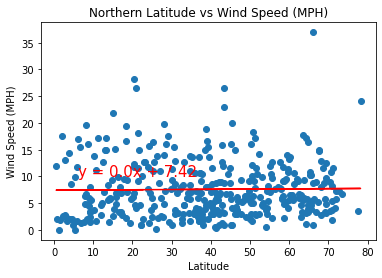

In [87]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Latitude vs Wind Speed (MPH)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

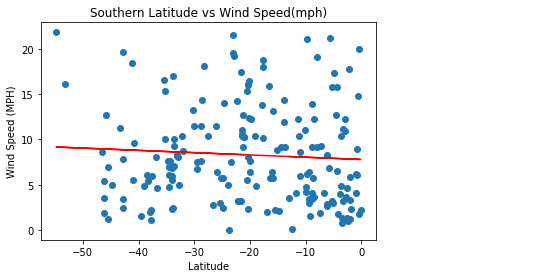

In [88]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Latitude vs Wind Speed(mph)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

In [ ]:
#Northern winds are higher that southern in general